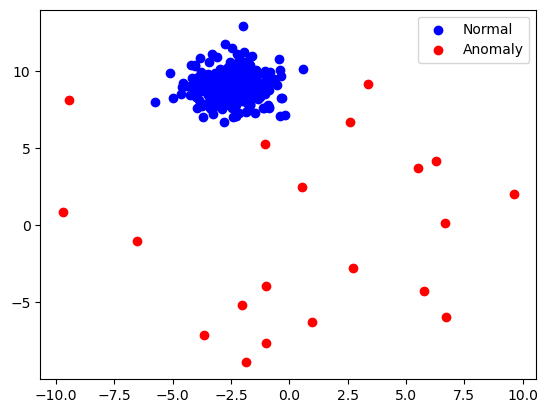

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# 生成正常數據
X, _ = make_blobs(n_samples=280, centers=1, n_features=2, random_state=42)

# 生成一些異常數據
np.random.seed(40)
n_outliers = 20
outliers = np.random.uniform(low=-10, high=10, size=(n_outliers, 2))

# 將正常數據和異常數據合併
X = np.concatenate([X, outliers])

# 可視化數據
plt.scatter(X[:-n_outliers, 0], X[:-n_outliers, 1], color='blue', label='Normal')
plt.scatter(X[-n_outliers:, 0], X[-n_outliers:, 1], color='red', label='Anomaly')
plt.legend()
plt.show()


In [2]:
x1 = X[:,0] 
x2 = X[:,1] 

<function matplotlib.pyplot.show(close=None, block=None)>

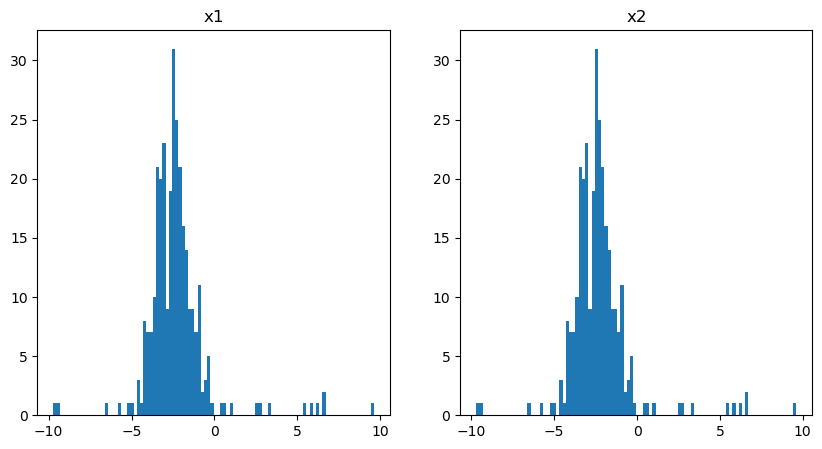

In [3]:
plt.figure(figsize=(10,5))

plt.subplot(121)
plt.title('x1')
plt.hist(x1,bins=100)
plt.subplot(122)
plt.title('x2')
plt.hist(x1,bins=100)
plt.show


In [4]:
x1_mean = x1.mean()
x1_sigma = x1.std()
x2_mean = x2.mean()
x2_sigma = x2.std()
print(x1_mean,x1_sigma,x2_mean,x2_sigma)

-2.3073615208500162 1.8436303516637607 8.368876593709572 2.911059904507219


In [5]:
from scipy.stats import norm
x_range = np.linspace(-10,10,300)
x1_nomal = norm.pdf(x_range,x1_mean,x1_sigma)
x2_nomal = norm.pdf(x_range,x2_mean,x2_sigma)

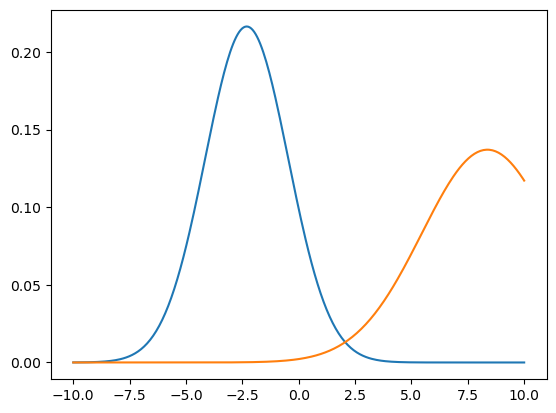

In [6]:
plt.plot(x_range,x1_nomal)
plt.plot(x_range,x2_nomal)    

In [7]:
from sklearn.covariance import EllipticEnvelope
ad_model = EllipticEnvelope()
ad_model.fit(X)



EllipticEnvelope()

In [9]:
y_pre = ad_model.predict(X)
print(pd.value_counts(y_pre))

 1    270
-1     30
Name: count, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

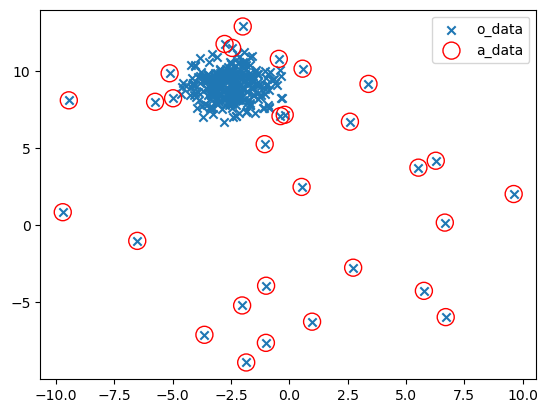

In [20]:

o_data = plt.scatter(X[:,0],X[:,1],marker='x',label = 'o_data')
a_dara = plt.scatter(X[:,0][y_pre==-1],X[:,1][y_pre==-1],marker='o',facecolor='none',edgecolor= 'red',s=150, label = '_data')
plt.legend()
plt.show

## contamination 0.07
from sklearn.covariance import EllipticEnvelope
ad_model = EllipticEnvelope(contamination=0.07)
ad_model.fit(X)

y_pre = ad_model.predict(X)
print(pd.value_counts(y_pre))

o_data = plt.scatter(X[:,0],X[:,1],marker='x',label = 'o_data')
a_dara = plt.scatter(X[:,0][y_pre==-1],X[:,1][y_pre==-1],marker='o',facecolor='none',edgecolor= 'red',s=150, label = 'a_data')
plt.legend()
plt.show

 1    279
-1     21
Name: count, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

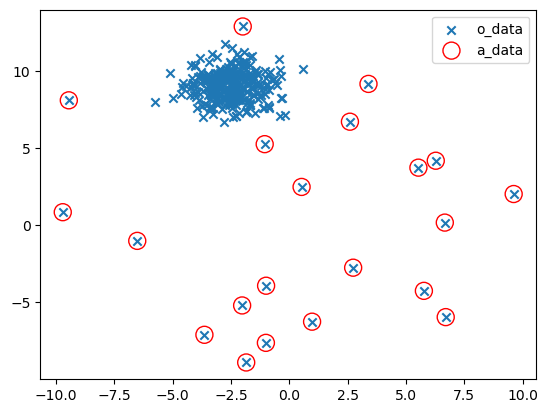

In [32]:
from sklearn.covariance import EllipticEnvelope 

ad_model = EllipticEnvelope(contamination=0.07) 
ad_model.fit(X)
y_pre = ad_model.predict(X) 
print(pd.value_counts(y_pre))

o_data = plt.scatter(X[:,0],X[:,1],marker='x',label = 'o_data') 
a_dara = plt.scatter(X[:,0][y_pre==-1],X[:,1][y_pre==-1],marker='o',facecolor='none',edgecolor= 'red',s=150, label = 'a_data') 
plt.legend() 
plt.show